In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import sympy

In [2]:
def ec_1(x):
    return x**3 - 77*x

def ec_2(x):
    return x**3 - 15*x

def ec_3(x):
    return x**3 - 93*x

#Find the least number to be added to get a perfect square
#https://www.geeksforgeeks.org/least-number-to-be-added-to-or-subtracted-from-n-to-make-it-a-perfect-square/
def nearest(n):
    prevSquare = int(math.sqrt(n))
    nextSquare = prevSquare + 1
    prevSquare = prevSquare * prevSquare
    nextSquare = nextSquare * nextSquare
    return nextSquare - n

#https://www.geeksforgeeks.org/fraction-module-python/
def find_rational_point(p, q, max_iter):
    for a in range(max_iter):
        D=a**4/4+p*q
        sqrtD = math.sqrt(D)
        if sqrtD.is_integer():
                x1 = a**2/2 + math.sqrt(D)
                y1 = a*x1
                x2 = a**2/2 - math.sqrt(D)
                y2 = a*x2
                return [(x1, y1), (x2, y2), a, D]
    return None


In [3]:
print(find_rational_point(7,3,100000))
print(find_rational_point(5,13,100000))
print(find_rational_point(7,11,100000))

print(15+23172**4/4)
print(math.sqrt(15+23172**4/4))

print(268470792*268470792)

[(7.0, 14.0), (-3.0, -6.0), 2, 25.0]
[(65.0, 520.0), (-1.0, -8.0), 8, 1089.0]
[(11.0, 22.0), (-7.0, -14.0), 2, 81.0]
7.207656615710728e+16
268470792.0
72076566157107264


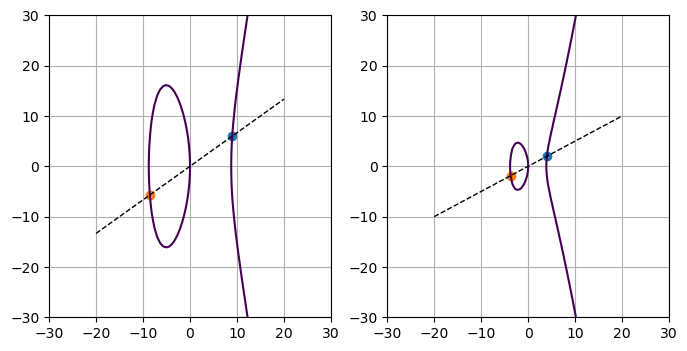

In [4]:
#https://volya.xyz/ecc/
#https://stackoverflow.com/questions/31074172/elliptic-curve-point-addition-over-a-finite-field-in-python
#https://github.com/fangpenlin/elliptic-curve-explained/blob/master/elliptic-curve.ipynb
subplot_size=4
subplot_cols=2
subplot_rows=1

fig, ax = plt.subplots(subplot_rows, subplot_cols, figsize=(subplot_size*subplot_cols,subplot_size*subplot_rows), dpi=100)
ax = ax.flatten()

y, x = np.ogrid[-30:30:100j, -30:30:100j]
ax[0].contour(x.ravel(), y.ravel(), y**2 - ec_1(x), [0])
ax[0].grid()
P=[9,6]
Q=[-77/9,-154/27]
ax[0].scatter(*P)
ax[0].scatter(*Q)

t = np.arange(-20, 20, 1)
step=0.001
x_list = [x * step for x in range(int(-20/step), int(20/step))]

slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[0].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

ax[1].contour(x.ravel(), y.ravel(), y**2 - ec_2(x), [0])
ax[1].grid()
P=[4,2]
Q=[-15/4,-15/8]
ax[1].scatter(*P)
ax[1].scatter(*Q)
slope=(Q[1]-P[1])/(Q[0]-P[0])
y_list = [slope*i for i in x_list]
ax[1].plot(x_list, y_list, linestyle='--', c='black', linewidth=1)

#ax[2].contour(x.ravel(), y.ravel(), y**2 - ec_3(x), [0])
#ax[2].grid()

plt.show()


In [18]:
primes = [3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101,	103,107,109,113,127,131,137,139,149,151,157,163,167,173,179,181,191,193,197,199,211,223,227,229,233,239,241,251,257,263,269,271,277,281]

list1 = []
for a in range(1,1000):
    for b in range(1,1000):
        if (b != 0):
            for p in primes:
                q=(a**2+b**2)/(p*b**2)
                if q>p and q.is_integer() and sympy.isprime(int(q)):
                    #print("{0} {1} {2} {3}".format(p,q,a,b))
                    if p < 100 and q < 50:
                        print("{0} {1} {2} {3}".format(p,q,a,b))
                    list1.append((p,int(q)))

print("####")

list2 = []
for a in range(1,1000):
    for b in range(1,1000):
        if (a != 0 and b != 0):
            for p in primes:
                q=(b**2-2*a**2)/(4*b**2)
                if q>p and q.is_integer() and sympy.isprime(int(q)):
                    if True or p < 100 and q < 50:
                        print("{0} {1} {2} {3}".format(p,q,a,b))
                    list2.append((p,int(q)))

#print(set(list1) - set(list2))

5 13.0 8 1
5 29.0 12 1
5 13.0 16 2
5 29.0 24 2
5 13.0 24 3
5 13.0 32 4
5 29.0 36 3
5 13.0 40 5
5 29.0 48 4
5 13.0 48 6
5 13.0 56 7
5 29.0 60 5
5 13.0 64 8
5 29.0 72 6
5 13.0 72 9
5 13.0 80 10
5 29.0 84 7
5 13.0 88 11
5 29.0 96 8
5 13.0 96 12
5 13.0 104 13
5 29.0 108 9
5 13.0 112 14
5 29.0 120 10
5 13.0 120 15
5 13.0 128 16
5 29.0 132 11
5 13.0 136 17
5 29.0 144 12
5 13.0 144 18
5 13.0 152 19
5 29.0 156 13
5 13.0 160 20
5 29.0 168 14
5 13.0 168 21
5 13.0 176 22
5 29.0 180 15
5 13.0 184 23
5 29.0 192 16
5 13.0 192 24
5 13.0 200 25
5 29.0 204 17
5 13.0 208 26
5 29.0 216 18
5 13.0 216 27
5 13.0 224 28
5 29.0 228 19
5 13.0 232 29
5 29.0 240 20
5 13.0 240 30
5 13.0 248 31
5 29.0 252 21
5 13.0 256 32
5 29.0 264 22
5 13.0 264 33
5 13.0 272 34
5 29.0 276 23
5 13.0 280 35
5 29.0 288 24
5 13.0 288 36
5 13.0 296 37
5 29.0 300 25
5 13.0 304 38
5 29.0 312 26
5 13.0 312 39
5 13.0 320 40
5 29.0 324 27
5 13.0 328 41
5 29.0 336 28
5 13.0 336 42
5 13.0 344 43
5 29.0 348 29
5 13.0 352 44
5 29.0 360 30
5 1

KeyboardInterrupt: 